<a href="https://colab.research.google.com/github/UtkarshAIITB/Time-Series-Analysis/blob/main/Time_series_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [4]:
df_tesla=pdr.get_data_yahoo('TSLA')

In [5]:
df_tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-07-06,703.690002,681.559998,692.340027,695.200012,23951200.0,695.200012
2022-07-07,736.090027,696.630005,701.760010,733.630005,27310200.0,733.630005
2022-07-08,764.940002,723.479980,727.000000,752.289978,33343700.0,752.289978
2022-07-11,759.190002,700.880005,756.309998,703.030029,33080400.0,703.030029
2022-07-12,719.320007,685.109985,710.539978,699.210022,29251100.0,699.210022


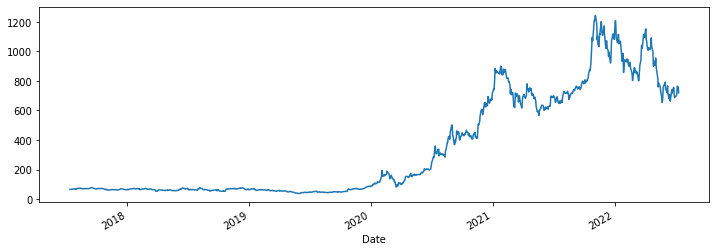

In [6]:
df_tesla['High'].plot(figsize=(12,4))

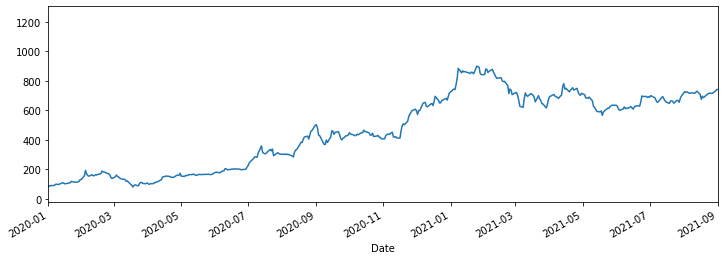

In [7]:
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],figsize=(12,4))

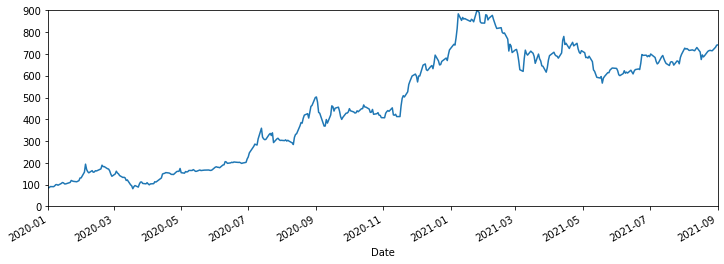

In [8]:
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,900],figsize=(12,4))

In [9]:
df_tesla.index

DatetimeIndex(['2017-07-14', '2017-07-17', '2017-07-18', '2017-07-19',
               '2017-07-20', '2017-07-21', '2017-07-24', '2017-07-25',
               '2017-07-26', '2017-07-27',
               ...
               '2022-06-28', '2022-06-29', '2022-06-30', '2022-07-01',
               '2022-07-05', '2022-07-06', '2022-07-07', '2022-07-08',
               '2022-07-11', '2022-07-12'],
              dtype='datetime64[ns]', name='Date', length=1257, freq=None)

In [10]:
index=df_tesla.loc['2020-01-01':'2021-09-01'].index
share_open=df_tesla.loc['2020-01-01':'2021-09-01']['Open']

In [11]:
share_open

Date
2020-01-02     84.900002
2020-01-03     88.099998
2020-01-06     88.094002
2020-01-07     92.279999
2020-01-08     94.739998
                 ...    
2021-08-26    708.309998
2021-08-27    705.000000
2021-08-30    714.719971
2021-08-31    733.000000
2021-09-01    734.080017
Name: Open, Length: 421, dtype: float64

In [12]:
index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-08-19', '2021-08-20', '2021-08-23', '2021-08-24',
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', name='Date', length=421, freq=None)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

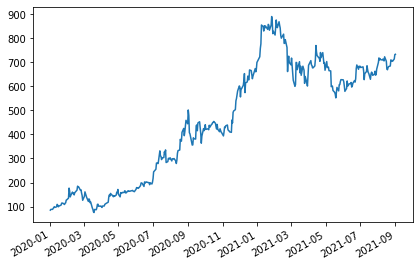

In [14]:
figure,axis=plt.subplots()
plt.tight_layout()
## Preventing overlapping
figure.autofmt_xdate()
axis.plot(index,share_open)

In [15]:
df_tesla=df_tesla.reset_index()

In [16]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1257 non-null   datetime64[ns]
 1   High       1257 non-null   float64       
 2   Low        1257 non-null   float64       
 3   Open       1257 non-null   float64       
 4   Close      1257 non-null   float64       
 5   Volume     1257 non-null   float64       
 6   Adj Close  1257 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 68.9 KB


In [18]:
df_tesla=df_tesla.set_index('Date',drop=True)
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-14,65.683998,64.244003,64.638000,65.556000,28126000.0,65.556000
2017-07-17,65.419998,62.689999,65.108002,63.914001,49384500.0,63.914001
2017-07-18,65.825996,63.132000,63.500000,65.648003,31868500.0,65.648003
2017-07-19,66.330002,64.643997,65.646004,65.052002,31785000.0,65.052002
2017-07-20,66.043999,64.839996,65.379997,65.984001,25831000.0,65.984001


## Time Resampling

In [19]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-14,65.683998,64.244003,64.638000,65.556000,28126000.0,65.556000
2017-07-17,65.419998,62.689999,65.108002,63.914001,49384500.0,63.914001
2017-07-18,65.825996,63.132000,63.500000,65.648003,31868500.0,65.648003
2017-07-19,66.330002,64.643997,65.646004,65.052002,31785000.0,65.052002
2017-07-20,66.043999,64.839996,65.379997,65.984001,25831000.0,65.984001


In [20]:
df_tesla.resample(rule='A').min()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,60.891998,58.526001,59.900002,59.852001,15247500.0,59.852001
2018-12-31,52.066002,48.917999,50.556000,50.112000,15403500.0,50.112000
2019-12-31,37.335999,35.397999,36.220001,35.793999,12328000.0,35.793999
2020-12-31,80.972000,70.101997,74.940002,72.244003,17357700.0,72.244003
2021-12-31,566.210022,539.489990,552.549988,563.000000,9800600.0,563.000000
2022-12-31,653.919983,620.570007,623.849976,628.159973,16330900.0,628.159973


In [21]:
df_tesla.resample(rule='A').max()
# returns max high, low, open, close etc in each year

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,77.921997,75.536003,76.050003,77.000000,98957000.0,77.000000
2018-12-31,77.491997,73.424004,75.000000,75.914001,168248500.0,75.914001
2019-12-31,87.061996,85.269997,87.000000,86.188004,150030500.0,86.188004
2020-12-31,718.719971,691.119995,699.989990,705.669983,304694000.0,705.669983
2021-12-31,1243.489990,1217.000000,1234.410034,1229.910034,89396500.0,1229.910034
2022-12-31,1208.000000,1136.040039,1189.550049,1199.780029,50521900.0,1199.780029


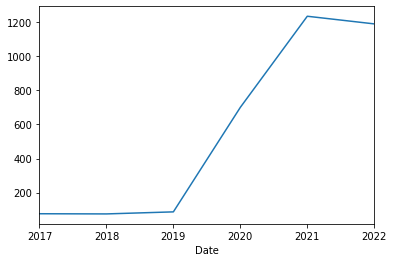

In [22]:
df_tesla.resample(rule='A').max()['Open'].plot()
# A = year-end frequency

In [23]:
# quarterly
df_tesla.resample(rule='QS').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-01,77.921997,75.536003,76.050003,77.000000,67675000.0,77.000000
2017-10-01,72.599998,70.825996,71.396004,71.930000,98957000.0,71.930000
2018-01-01,72.099998,70.472000,72.000000,71.484001,105007000.0,71.484001
2018-04-01,74.746002,70.900002,73.031998,74.166000,111737000.0,74.166000
2018-07-01,77.491997,73.424004,73.818001,75.914001,168248500.0,75.914001
2018-10-01,75.898003,73.349998,75.000000,75.358002,137127500.0,75.358002
2019-01-01,70.400002,68.830002,69.241997,69.461998,120754000.0,69.461998
2019-04-01,59.234001,57.433998,57.660000,58.362000,132735500.0,58.362000
2019-07-01,53.214001,51.632000,51.834000,52.976002,112091500.0,52.976002


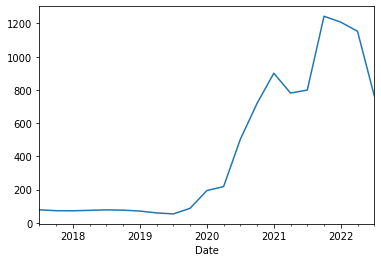

In [24]:
df_tesla.resample(rule='QS').max()['High'].plot()

In [25]:
df_tesla['Open:30 days rolling']=df_tesla['Open'].rolling(30).mean()

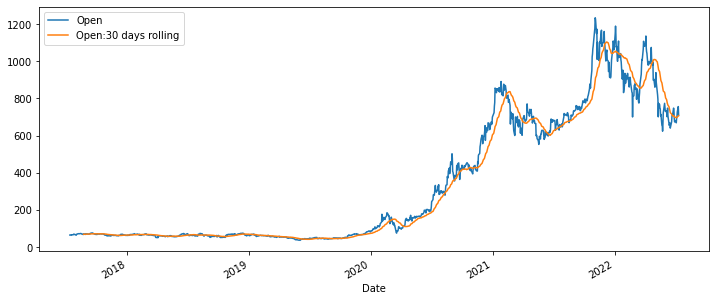

In [26]:
df_tesla[['Open','Open:30 days rolling']].plot(figsize=(12,5))